In [1]:
"""
Name: example_calibration.ipynb
Authors: Stephan Meighen-Berger
Shows an example calibration run of the module
"""

'\nName: example_calibration.ipynb\nAuthors: Stephan Meighen-Berger\nShows an example calibration run of the module\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import imageio
from tqdm import tqdm

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Module imports
from fourth_day import Fourth_Day, config

In [6]:
# Some example settings
config['scenario']['class'] = 'Calibration'
config['scenario']['light prop'] = {
            "switch": True,
            "x_pos": 5.,
            "y_pos": 10.,
        }
config['scenario']['detector'] = {
    "switch": True,
    "type": "PMTSpec",
    "response": True,
    "acceptance": "Flat",
    "mean detection prob": 0.5
}
# Geometry
config['geometry']['volume'] = {
    'function': 'rectangle',
    'x_length': 26.,
    'y_length': 10.,
    'offset': None,
}
config['geometry']['observation'] = {
    'function': 'rectangle',
    'x_length': 26.,
    'y_length': 10.,
    "offset": np.array([0., 0.]),
}
config['geometry']["exclusion"] = {
    "function": "sphere",
    "radius": 0.15,
    "x_pos": 2.,
    "y_pos": 5.,
}
# Water
config['water']['model']['name'] = 'custom' # 'potential cylinder'
config['water']['model']['off set'] = np.array([0., 2.5])
config['water']['model']['directory'] = "../data/current/Long_run_corr/"
config['water']['model']['time step'] = 0.1
config['advanced']['starting step'] = 0

In [7]:
# Creating a fourth_day object
fd = Fourth_Day()

In [8]:
# Launching solver
fd.sim()

0
[1.76817245e-05]
1
[1.86638705e-05 1.86638705e-05]
2
[1.76817245e-05 1.76817245e-05]
3
[1.6753205e-05 1.6753205e-05]
4
[1.88650952e-05 1.88650952e-05]
5
[1.88650952e-05 1.88650952e-05]
6
[1.65719877e-05 1.65719877e-05]
7
[1.65719877e-05 1.65719877e-05]
8
[1.80648859e-05 1.80648859e-05]
9
[1.96994941e-05 1.96994941e-05]
10
[1.73011058e-05 1.73011058e-05]
11
[1.58725777e-05 1.58725777e-05]
0
[1.76817245e-05]
1
[1.86638705e-05 1.86638705e-05]
2
[1.76817245e-05 1.76817245e-05]
3
[1.6753205e-05 1.6753205e-05]
4
[1.88650952e-05 1.88650952e-05]
5
[1.88650952e-05 1.88650952e-05]
6
[1.65719877e-05 1.65719877e-05]
7
[1.65719877e-05 1.65719877e-05]
8
[1.80648859e-05 1.80648859e-05]
9
[1.96994941e-05 1.96994941e-05]
10
[1.73011058e-05 1.73011058e-05]
11
[1.58725777e-05 1.58725777e-05]
0
[1.76817245e-05]
1
[1.86638705e-05 1.86638705e-05]
2
[1.76817245e-05 1.76817245e-05]
3
[1.6753205e-05 1.6753205e-05]
4
[1.88650952e-05 1.88650952e-05]
5
[1.88650952e-05 1.88650952e-05]
6
[1.65719877e-05 1.6571987

In [9]:
# Plotting standards
std_size = 3.
fontsize = 10.
lw=1.
h_length=0.2

In [10]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [11]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


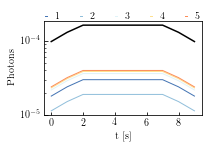

In [12]:
# Energy distributions
noise_par1 = 2e3
noise_par2 = 1e2
startpoint = 240.
width = 35
wavelengths = {
    "Detector 1": ["1", "#4575b4"],
    "Detector 5": ["2", "#91bfdb"],
    "Detector 8": ["3", "#e0f3f8"],
    "Detector 3": ["4", "#fee090"],
    "Detector 10": ["5", "#fc8d59"],
#     "Detector 2": ["6", "#d73027"],
}
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
for detector in wavelengths.keys():
    # Random noise
    ax1.plot(fd.t,
             smooth(fd.measured[detector].values, 5),
             lw=lw, label=r"$\mathrm{%s}$" % wavelengths[detector][0], color=wavelengths[detector][1])
total = smooth(fd.measured["Detector 1"].values, 5)
for detector in wavelengths.keys():
    if detector == "Detector 1":
        continue
    # Random noise
    total += smooth(fd.measured[detector].values, 5)
ax1.plot(fd.t, total, color='k')
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\mathrm{t}\;[\mathrm{s}]$', fontsize=fontsize)
ax1.set_ylabel(r'$\mathrm{Photons}$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
# ax1.grid(True)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.2),
                  ncol=5, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
# ax1.set_ylim(1e3,1e10)
# ax1.set_xlim(390., 400)
plt.tight_layout()
plt.show()

In [13]:
fd.measured

,Detector 0,Detector 1,Detector 2,Detector 3,Detector 4,Detector 5,Detector 6,Detector 7,Detector 8,Detector 9,Detector 10,Detector 11
0,0.0,0.00003,0.00005,0.000039,0.000189,0.000019,0.000017,0.000022,0.000036,0.000039,0.00004,0.000048
1,0.0,0.00003,0.00005,0.000039,0.000189,0.000019,0.000017,0.000022,0.000036,0.000039,0.00004,0.000048
2,0.0,0.00003,0.00005,0.000039,0.000189,0.000019,0.000017,0.000022,0.000036,0.000039,0.00004,0.000048
3,0.0,0.00003,0.00005,0.000039,0.000189,0.000019,0.000017,0.000022,0.000036,0.000039,0.00004,0.000048
4,0.0,0.00003,0.00005,0.000039,0.000189,0.000019,0.000017,0.000022,0.000036,0.000039,0.00004,0.000048
5,0.0,0.00003,0.00005,0.000039,0.000189,0.000019,0.000017,0.000022,0.000036,0.000039,0.00004,0.000048
6,0.0,0.00003,0.00005,0.000039,0.000189,0.000019,0.000017,0.000022,0.000036,0.000039,0.00004,0.000048
7,0.0,0.00003,0.00005,0.000039,0.000189,0.000019,0.000017,0.000022,0.000036,0.000039,0.00004,0.000048
8,0.0,0.00003,0.00005,0.000039,0.000189,0.000019,0.000017,0.000022,0.000036,0.000039,0.00004,0.000048
9,0.0,0.00003,0.00005,0.000039,0.000189,0.000019,0.000017,0.000022,0.000036,0.000039,0.00004,0.000048
